PREDICTON OF CROP USING SOIL-

INTRODUCTION -

1. CROP RECOMMENDATION USING SOIL ATTRIBUTES
Agricultural productivity is highly influenced by soil health, nutrient levels, and environmental conditions.Farming experience is normally used for    crop selection in conventional methods instead of using data. A crop recommendation system based on machine learning can process soil parameters (such as N, P, K, pH) and climate attributes (temperature, humidity, rainfall) to recommend the most appropriate crop. This increases yield, enhances sustainable agriculture, and encourages precision farming techniques.

2. MAIN OBJECTIVE OF THIS PROJECT
* To build a machine learning model that can accurately identify the most appropriate crop for a particular set of soil and environmental characteristics.
* To aid farmers and agricultural planners in making informed decisions based on data, enhancing productivity and soil health.

This project addresses the challenge of crop selection by:
* Interpreting soil nutrient and weather data to identify trends.
* Comparing various ML models (Random Forest, Decision Tree, KNN) to determine the best model.
* Enhancing agricultural efficiency through facilitating optimal crop-soil pairing.



1. **_IMPORTING LIBRARIES_**

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


2. **_IMPORTING DATASET_**

In [47]:
# IMPORTING DATASET
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


3. **_PERFORMING EXPLORATORY DATA ANALYSIS_**

Exploratory Data Analysis (EDA) is a crucial initial step in this crop recommendation project.It involves understanding the data, discovering patterns and anomalies, and finding potential problems prior to modeling. It involves missing value handling, outlier detection, removal of noisy data, and relationship study between input features (e.g., soil nutrient, temperature) and target crop. EDA findings dictate fundamental preprocessing operations like scaling and encoding to prepare the data to develop strong and robust machine learning models.

In [50]:
# shape of data 
df.shape

(2200, 8)

In [52]:
# column names in data 
col_name=df.columns
print("Column Names:")
count=0;
for col in col_name:
    print(f"- {col}")
    count=count+1
print(count)

Column Names:
- N
- P
- K
- temperature
- humidity
- ph
- rainfall
- label
8


In [54]:
# information of data
"""
a)	number of rows and columns
b)	number of non-null values
c)	the type of data is in each column
d)	the amount of memory our data frame is using
"""
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [56]:
# to display summary statistics like count, mean, standard deviation, min, max, and percentiles for numeric columns.
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [58]:
# checking the datatypes of all the column values seperatly
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


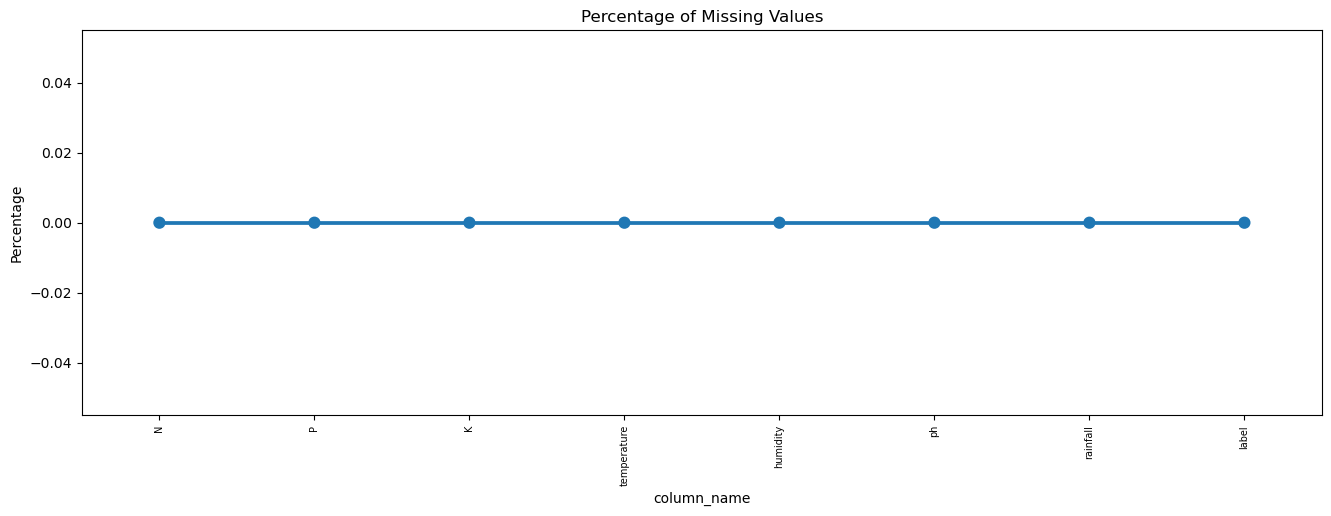

In [60]:
# finding missing values
missing_values = df.isnull().sum()
print(missing_values)

# percentage of missing values 
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column_name', 'percentage_missing']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column_name', y='percentage_missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

So from above values and graph none of the columns in our dataset contain missing values. 
Every column has 0 null entries, so we don't need to perform missing value imputation in preprocessing.

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


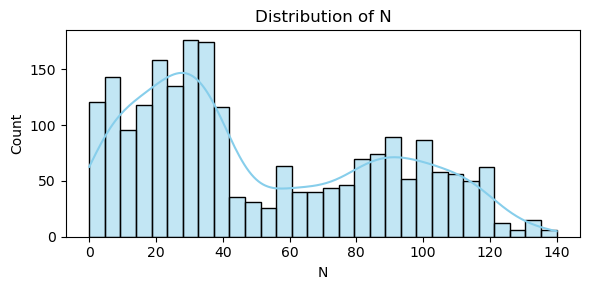

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


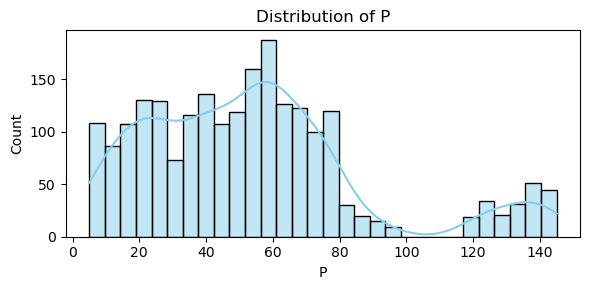

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


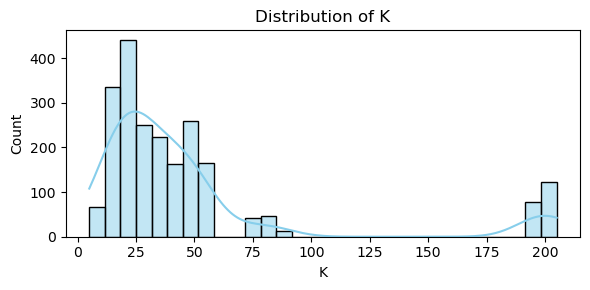

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


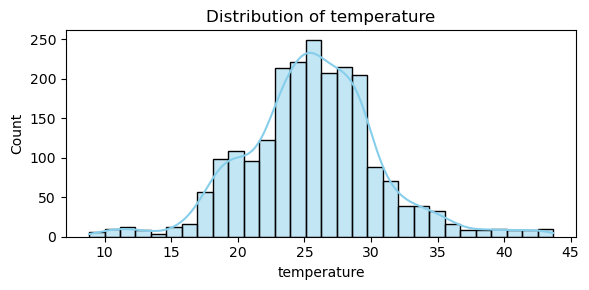

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


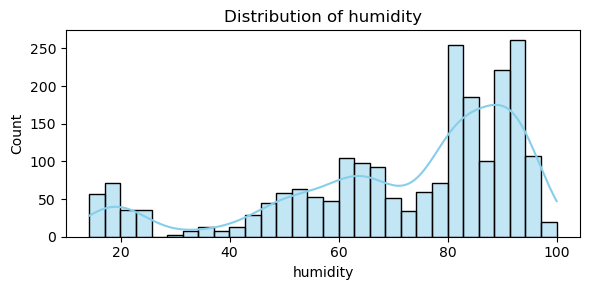

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


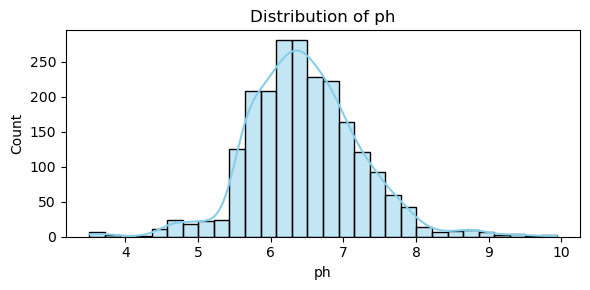

C:\Users\i5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


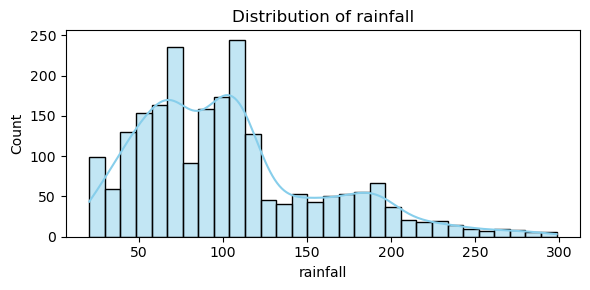

In [63]:
#  Plotting distribution of soil features (histograms)

soil_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in soil_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

#150 values between 30 and 35 → bar height is 150.

In [65]:
# Distinct values in the column label

crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


C:\Users\i5\AppData\Local\Temp\ipykernel_13500\1687438971.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['label']))


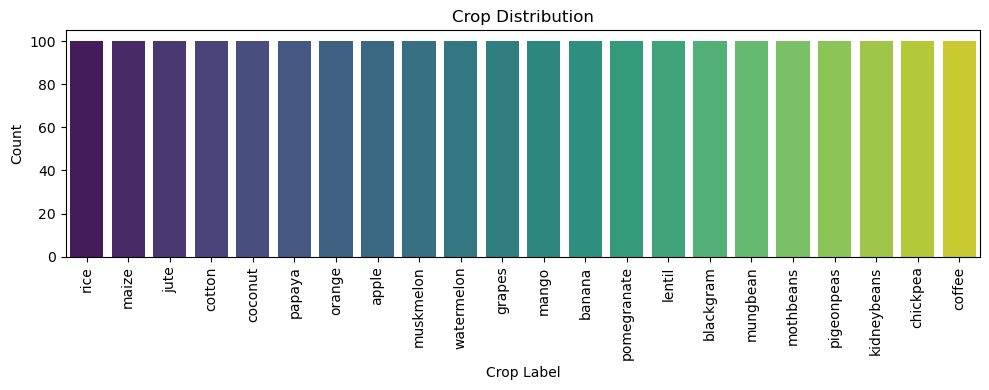

In [73]:
# countplot for crop labels

plt.figure(figsize=(10, 4))
crop_counts = df['label'].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Crop Distribution')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


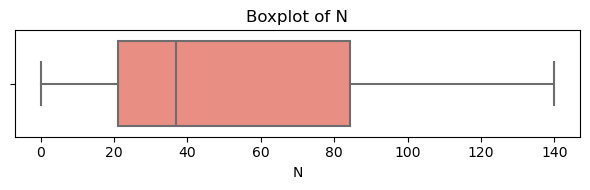

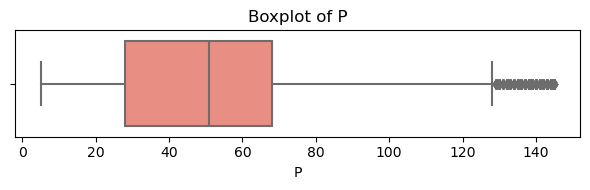

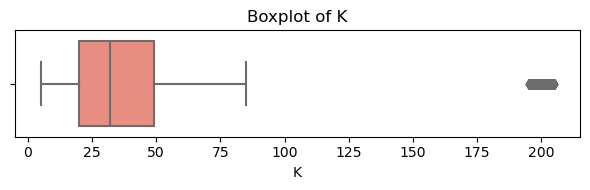

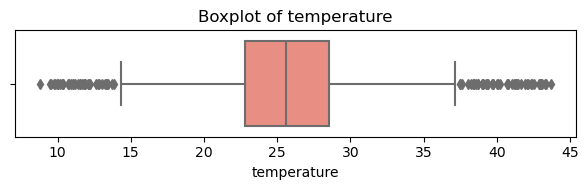

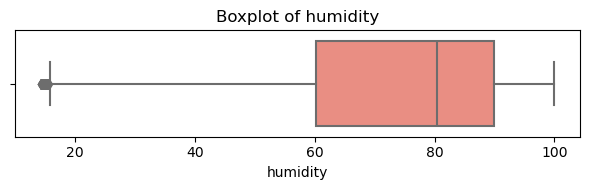

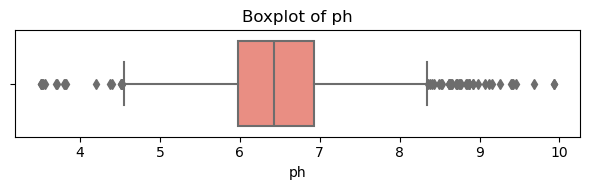

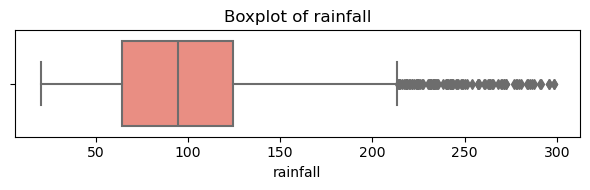

In [71]:
# Boxplots to visualize outliers
for feature in soil_features:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[feature], color='salmon')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

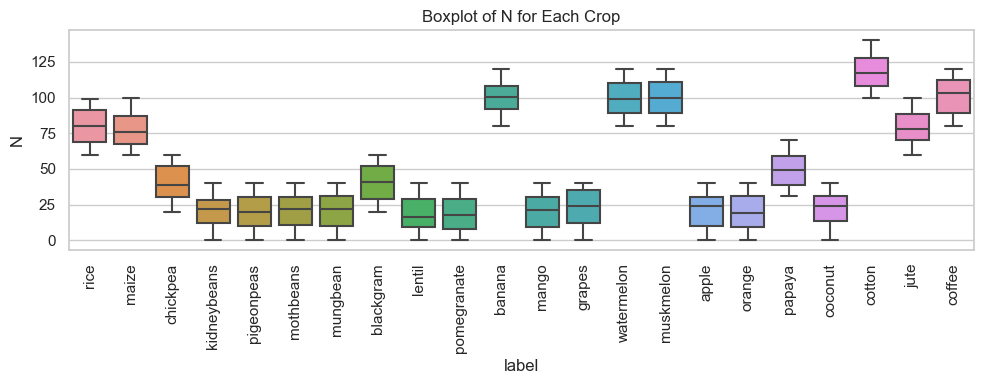

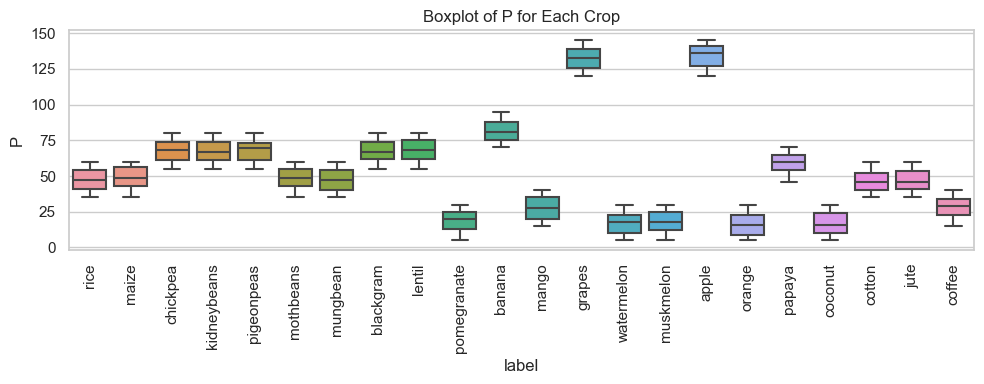

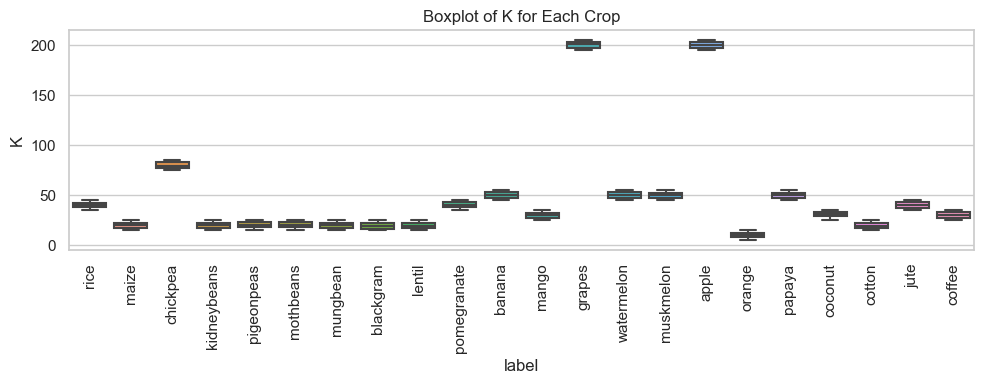

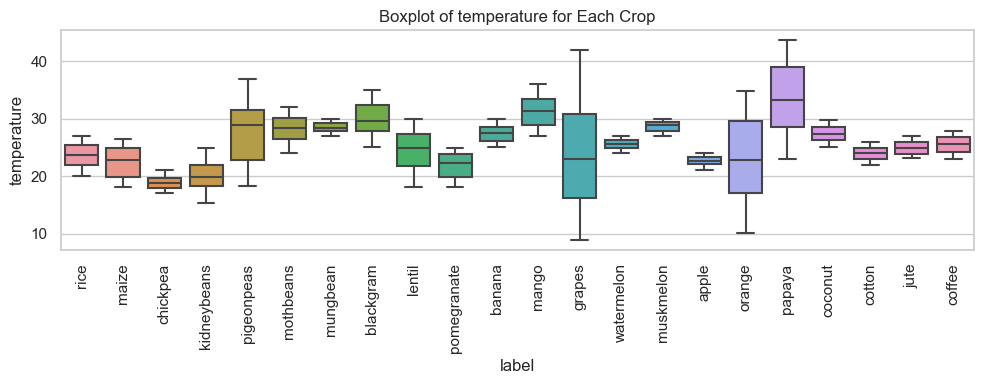

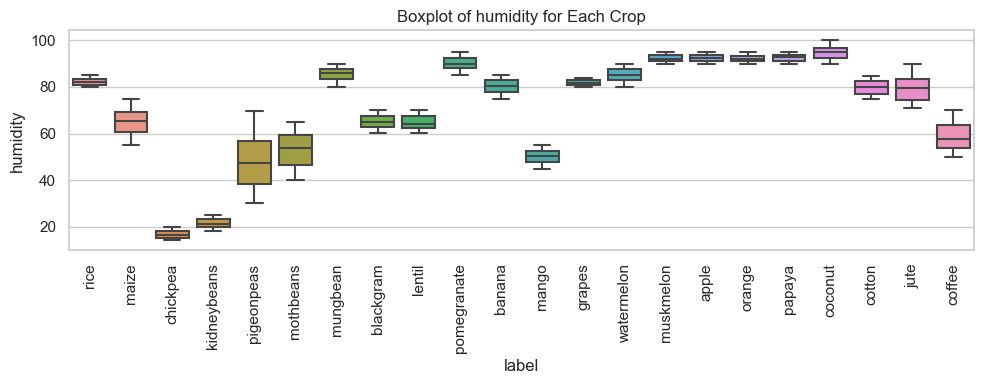

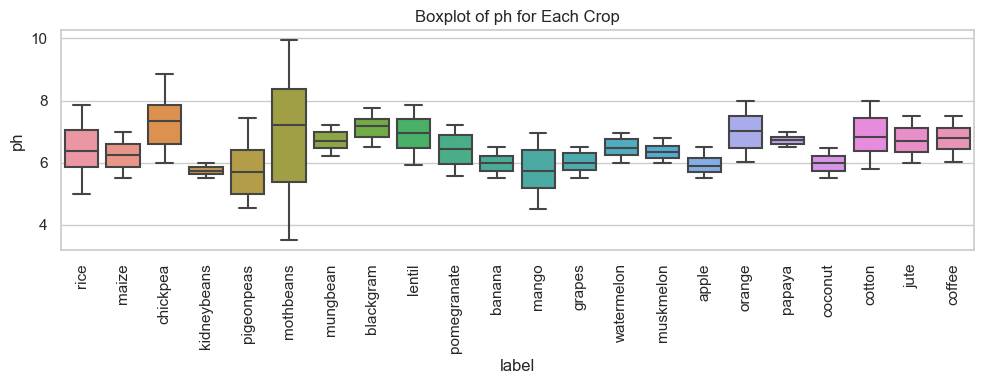

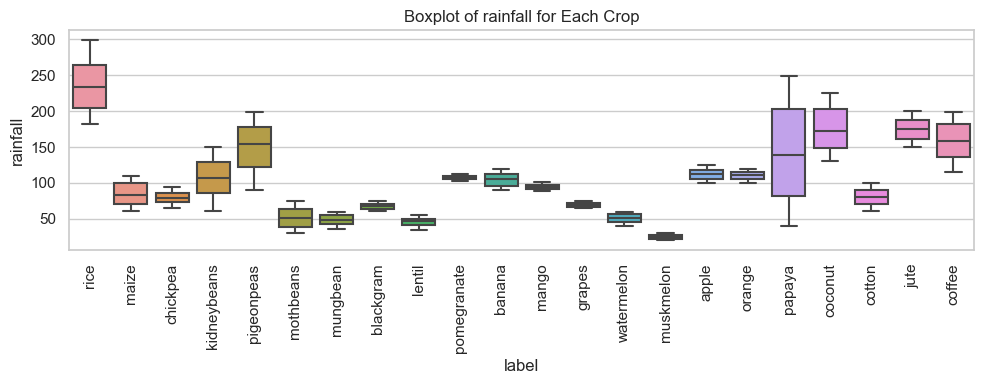

In [79]:
# Set the plot style
sns.set(style="whitegrid")

# Features (X columns) – exclude the label column
features = df.columns[:-1]  # assuming 'label' is the last column

# Create boxplots for each feature
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='label', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {feature} for Each Crop')
    plt.tight_layout()
    plt.show()


Boxplots were generated for each soil feature (N, P, K, temperature, humidity, pH, rainfall) across all crop types.Global boxplots identified statistical outliers for certain features, but crop-wise boxplots indicated that these values are normal in their respective crop classes.
So, overall there is no outliers.

In [88]:
# outlier detection
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    print(f"Lower limit: {lower_limit}  Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}  Maximum value: {x.max()}")

    if lower_limit > x.min():
        print("Lower limit failed → Need to remove minimum value")
    else:
        print("Lower limit passed → No need to remove minimum value")

    if upper_limit < x.max():
        print("Upper limit failed → Need to remove maximum value")
    else:
        print("Upper limit passed → No need to remove maximum value")


In [136]:
# outlier detection for each label w.r.t each feature
for crop in df['label'].unique():
    print(f"\n Crop: {crop}")
    for feature in features:
        print(f"\For crop label: {feature}")
        detect_outlier(df[feature][df['label'] == crop])
        print('-' * 60)


 Crop: rice
\For crop label: N
Lower limit: 42.5  Upper limit: 116.5
Minimum value: 60  Maximum value: 99
Lower limit passed → No need to remove minimum value
Upper limit passed → No need to remove maximum value
------------------------------------------------------------
\For crop label: P
Lower limit: 19.625  Upper limit: 74.625
Minimum value: 35  Maximum value: 60
Lower limit passed → No need to remove minimum value
Upper limit passed → No need to remove maximum value
------------------------------------------------------------
\For crop label: K
Lower limit: 32.0  Upper limit: 48.0
Minimum value: 35  Maximum value: 45
Lower limit passed → No need to remove minimum value
Upper limit passed → No need to remove maximum value
------------------------------------------------------------
\For crop label: temperature
Lower limit: 16.5304720125  Upper limit: 30.992543992500003
Minimum value: 20.0454142  Maximum value: 26.88444878
Lower limit passed → No need to remove minimum value
Upper 

So, from above there are no significant outliers were consistently found across all features for any specific crop label.


This indicates a well-distributed dataset that does not suffer from class-wise feature distortion.

4. **_SPLITTING THE DATASET_**


In [141]:
# Input and Output
x = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

In [143]:
# Label Encoding for column label 

en = LabelEncoder()
y = en.fit_transform(y_raw)


In [183]:
# Encoded value of each crop label
for i, label in enumerate(en.classes_):
    print(f"{i} → {label}")

0 → banana
1 → blackgram
2 → chickpea
3 → coconut
4 → coffee
5 → cotton
6 → jute
7 → kidneybeans
8 → lentil
9 → maize
10 → mango
11 → mothbeans
12 → mungbean
13 → muskmelon
14 → orange
15 → papaya
16 → pigeonpeas
17 → pomegranate
18 → rice
19 → watermelon


In [145]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [147]:
print(X_train,y_train)

[[111.          79.          53.         ...  75.77363772   6.16500128
  119.695765  ]
 [ 27.          64.          21.         ...  68.68401492   7.54380422
   73.67166182]
 [ 35.          30.          34.         ...  95.41122824   6.141502
  182.4482352 ]
 ...
 [ 24.          45.          19.         ...  48.8246387    5.95238496
   34.7426459 ]
 [ 31.          53.          16.         ...  85.81675947   6.45200645
   48.54598575]
 [ 89.          25.          54.         ...  85.56967628   6.35310739
   48.99390828]] [ 0  1  3 ... 11 12 19]


In [149]:
print(X_test,y_test)

[[ 22.          54.          20.         ...  83.63802195   6.68982516
   41.013132  ]
 [  6.           7.           7.         ...  94.47316879   7.1991062
  113.9995146 ]
 [ 41.          74.          18.         ...  61.02701476   6.5991473
   73.37686831]
 ...
 [ 20.          29.          10.         ...  93.27189064   7.36549204
  100.7896871 ]
 [120.          19.          49.         ...  84.26830701   6.76247163
   56.45229202]
 [ 38.          36.          21.         ...  84.8845732    6.55637297
   36.12042927]] [12 14  1  5  9  7  6 11  8 16 14 16  6  3 12 16 19  6  2  2 13  5 13  6
  8 10 12 12  2 11 17  7 14  3  5 15  5  3 11  2  2 12 12  1 17 11  9  4
  8  0 15  6 11  6  3  3 11 16  9 15  9  6 16 13 17 18 17 17  7  3  5 13
  3 18  4 16 16 13 11  4  9  8 11 13  4  9 15 13  7  9  5 19 12 10  0  7
 17 12  0 13 19  6 11  5  4  3  7 15  8  7  0  3  2 11  6  7 19  7  1  4
 11 11 14  5  9 17  1  9  3  9  3 13  9  2 17  9  0  0  5  9  2  9 16 17
 19 11 13  4 13  6 13 11  4  7 17  6

In [151]:
# classifiers for our mode
classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


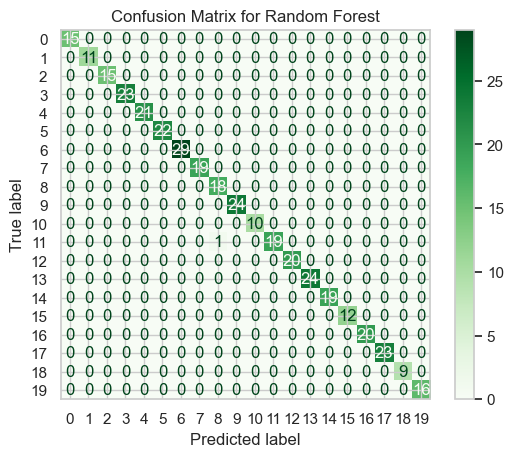

Random Forest Accuracy: 99.73%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        19
           8       0.95      1.00      0.97        18
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        10
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00       

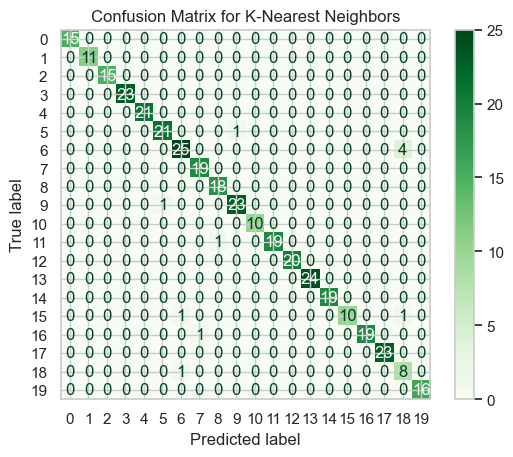

K-Nearest Neighbors Accuracy: 97.03%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        21
           5       0.95      0.95      0.95        22
           6       0.93      0.86      0.89        29
           7       0.95      1.00      0.97        19
           8       0.95      1.00      0.97        18
           9       0.96      0.96      0.96        24
          10       1.00      1.00      1.00        10
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      0.83      0.91        12
          16       1.00      0.95      0.97 

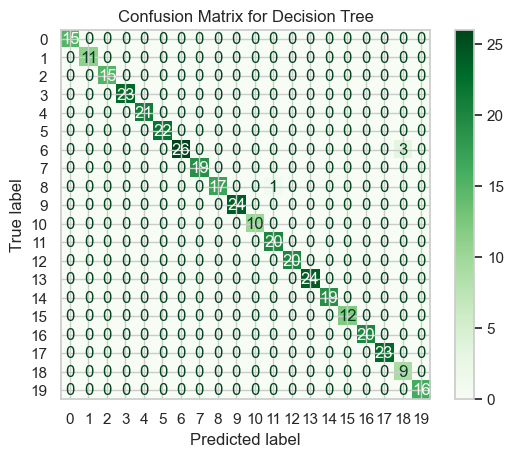

Decision Tree Accuracy: 98.92%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      0.90      0.95        29
           7       1.00      1.00      1.00        19
           8       1.00      0.94      0.97        18
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        10
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00       

In [185]:
# Evaluate each classifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train
    y_pred = clf.predict(X_test)  # Predict on test set

    # Confusion Matrix and Accuracy
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Greens')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

    print(classification_report(y_test, y_pred, zero_division=1))

    # Cross-validation score (5-fold)
    cv_scores = cross_val_score(clf, x, y, cv=5)
    print(f'{name} Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%')
    print('....................................................................')

In [187]:
# Final summary: Cross-validation accuracy of all models
print("\nAccuracy of all models")
for name in results:
    cv_scores = cross_val_score(classifiers[name], x, y, cv=5)
    print(f"{name}: {np.mean(cv_scores) * 100:.2f}%")



Accuracy of all models
Random Forest: 99.24%
K-Nearest Neighbors: 97.13%
Decision Tree: 98.32%


5. **_CONCLUSION_**

* Random Forest Classifier achieved the highest accuracy.

* Accuracy (5-fold Cross-Validation ): 98.24%